# **🌐 FIAP GLOBAL SOLUTION 2025 - 2º SEMESTRE**
## 🐍 Dynamic Programing

### **👥 Integrantes (2ESPH):**

```
RM 556197 | Caio Felipe de Lima Bezerra
RM 555490 | Marcos Vinícius da Silva Costa
RM 554736 | Rafael Federici de Oliveira
```

### **🎯 Objetivo do Relatório:**
Implementar, executar e analisar os resultados dos desafios propostos na GS Dynamic Programming:

- **DESAFIO 01:** Caminho de Valor Máximo
- **DESAFIO 02:** Verificação Crítica
- **DESAFIO 03:** Pivô Mais Rápido
- **DESAFIO 04:** Trilhas Paralelas
- **DESAFIO 05:** Recomendar Próximas Habilidades

## **⬇️ IMPORTS:**

In [430]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from collections import Counter

from data.dados import dic_skills as SKILLS
from desafios.d1.runner import executarDesafio1
from desafios.d2.runner import executarDesafio2
from desafios.d3.runner import executarDesafio3
from desafios.d3.modelo_basico import skillsBasicas
from desafios.d4.runner import executarDesafio4
from desafios.d5.runner import executarDesafio5

## **🧩 DADOS:**

In [431]:
df_skills = pd.DataFrame(SKILLS).T
print('Base de Dados de Skills:')
df_skills


Base de Dados de Skills:


,Nome,Tempo,Valor,Complexidade,PreRequisito,UsoPrincipal
S1,Programacao Basica (Python),80,3,4,[],Base
S2,Modelagem de Dados (SQL),60,4,3,[],Base
S3,Algoritmos Avancados,100,7,8,[S1],Critica (HC1)
S4,Fundamentos de Machine Learning,120,8,9,"[S1, S3]",Nao Critica
S5,Visualizacao de Dados (BI),40,6,5,[S2],Critica (HC2)
S6,IA Generativa Etica,150,10,10,[S4],Objetivo Final
S7,Estruturas em Nuvem (AWS/Azure),70,5,7,[],Critica (HC3)
S8,APIs e Microsservicos,90,6,6,[S1],Critica (HC4)
S9,DevOps & CI/CD,110,9,8,"[S7, S8]",Critica (HC5)
H10,Seguranca de Dados,60,5,6,[],Lista Grande


## **1️⃣ DESAFIO 01: Caminho de Valor Máximo**

**🎯 OBJETIVO:** Encontrar a sequência de habilidades (do estado atual até S6) que maximize o Valor Esperado sob restrições T ≤ 350h e Cumulativo de Complexidade C ≤ 30.

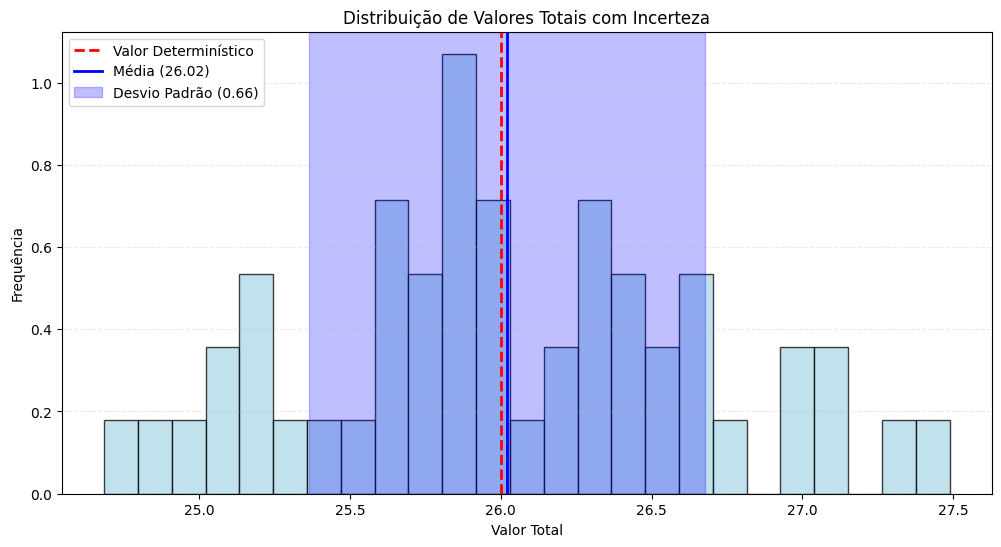

In [432]:
resultado_d1 = executarDesafio1(runs=1000, seed=42)

# Gráfico de histograma dos valores totais com incerteza
mc = resultado_d1['Calcular_Incerteza']
vals = mc['Amostras']
media = np.mean(vals)
desvio = np.std(vals)
valor_det = resultado_d1['Solucao_Deterministica']['Melhor_Sem_Alvo']['Valor']

plt.figure(figsize=(12, 6))
plt.hist(vals, bins=25, color='lightblue', edgecolor='black', alpha=0.75, density=True)
plt.axvline(valor_det, color='red', linestyle='--', linewidth=2, label=f'Valor Determinístico')
plt.axvline(media, color='blue', linestyle='-', linewidth=2, label=f'Média ({media:.2f})')
plt.axvspan(media - desvio, media + desvio, color='blue', alpha=0.25, label=f'Desvio Padrão ({desvio:.2f})')
plt.title('Distribuição de Valores Totais com Incerteza')
plt.xlabel('Valor Total')
plt.ylabel('Frequência')
plt.legend(loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.25)
plt.show()


## **📋 CONCLUSÃO - DESAFIO 01**

### RESULTADO DETERMINÍSTICO:

Os algoritmos feitos para o DESAFIO 01 calcularam se era possível atingir a skill S6 (IA Generativa Ética) respeitando certas restrições.

- Tempo ≤ 350 horas
- Complexidade ≤ 30

Porém, o conjunto mínimo para incluir S6 {S1, S3, S4, S6} ultrapassa os limites das restrições. Logo, e impossível incluir S6 na solução ótima.

Assim, fizemos uma solução ótima sem incluir o alvo, que resultou em:

- Valor Total = 26
- Tempo = 340 horas
- Complexidade = 28
- Conjunto = {S1, S2, S5, S7, H10, H12}

### RESULTADO COM INCERTEZA:

A simulação (Monte Carlo) executa 1000 cenários onde cada valor (V) é testado aleatoriamente

```V ​∼ Uniforme (V​−10%, V​+10%)```

Para cada cenário, o valor total do mesmo conjunto ótimo é recalculado.

Isso gera 1000 valores de "Valor Total", formando uma distribuição estatística.

O gráfico mostra que a os "Valores Totais" sob incerteza tem uma variação pequena, com a maior parte das simulações concentrada entre 25,5 e 26,5, confirmando a precisão da solução determinística.

## **2️⃣ DESAFIO 02: Verificação Crítica**

**🎯 OBJETIVO:** Considerando as 5 Habilidades Críticas (S3, S5, S7, S8, S9), enumerar as 120 permutações e calcular o custo total (Tempo de Aquisição + Espera por Pré-Requisitos).

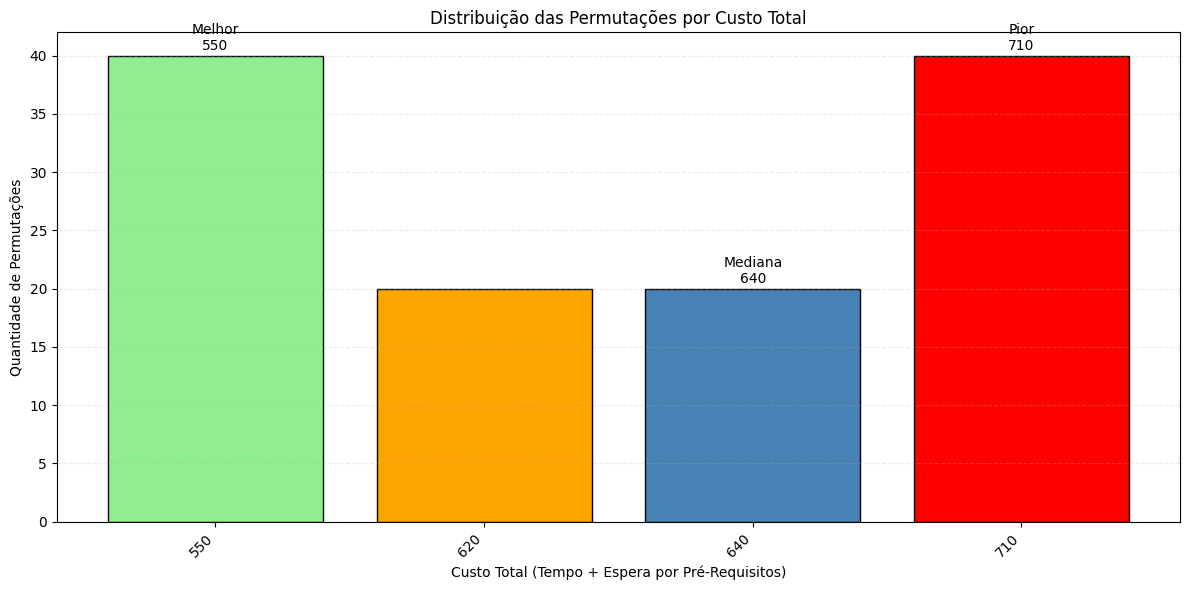

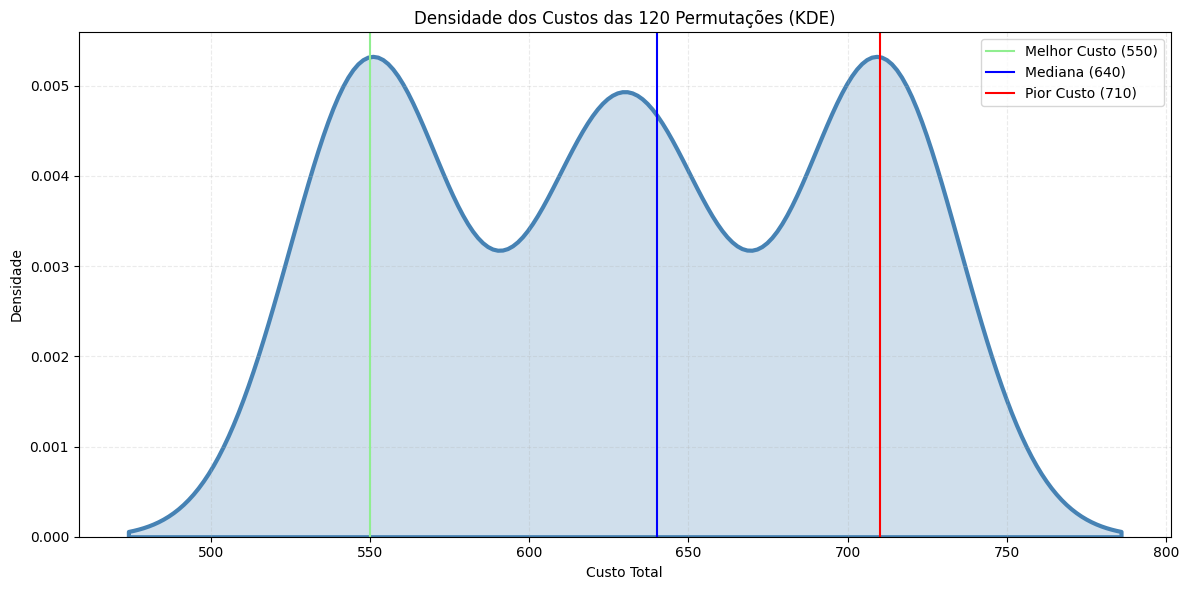

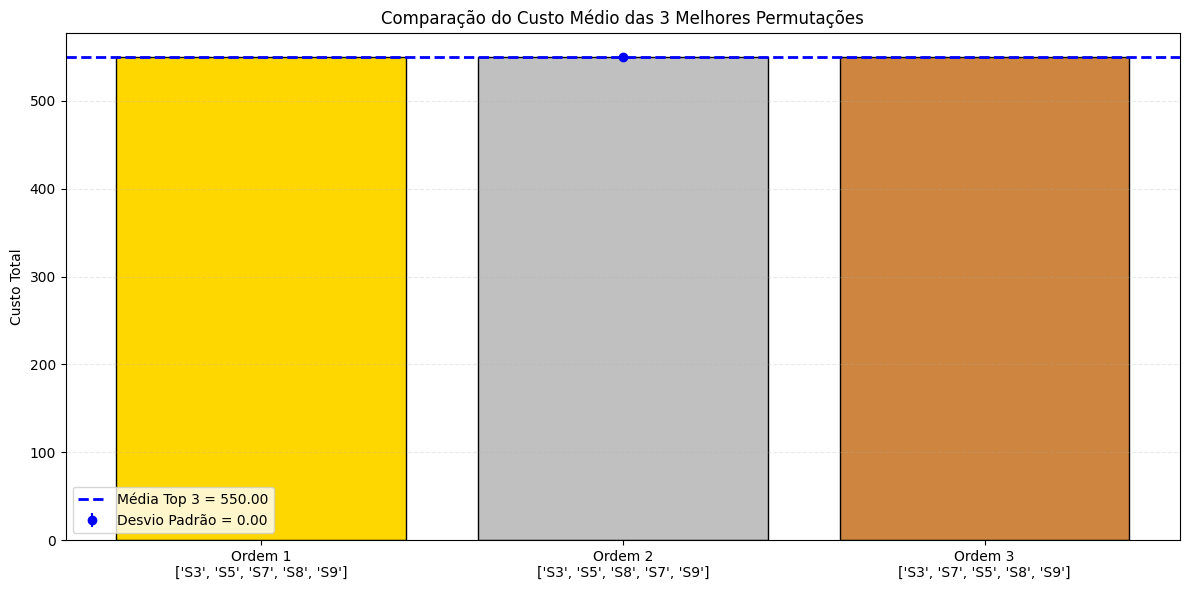

In [433]:
resultado_d2 = executarDesafio2()

perms_info = resultado_d2['Permutacoes_e_Custos']

# Gráfico de barras dos custos
if not perms_info['OK']:
    print('Erro:', perms_info['Erros'])
else:
    perms = perms_info['Permutacoes']
    custos = [p['Custo'] for p in perms]
    contagem = Counter(custos)
    custos_unicos = sorted(contagem.keys())
    qtdes = [contagem[c] for c in custos_unicos]
    melhor = custos_unicos[0]
    mediana = custos_unicos[len(custos_unicos)//2]
    pior = custos_unicos[-1]
    colors = []
    for c in custos_unicos:
        if c == melhor:
            colors.append('lightgreen')
        elif c == pior:
            colors.append('red')
        elif c == mediana:
            colors.append('steelblue')
        else:
            colors.append('orange')

    plt.figure(figsize=(12, 6))
    x = np.arange(len(custos_unicos))
    plt.bar(x, qtdes, color=colors, edgecolor='black')
    plt.xticks(x, custos_unicos, rotation=45, ha='right')
    plt.ylabel('Quantidade de Permutações')
    plt.xlabel('Custo Total (Tempo + Espera por Pré-Requisitos)')
    plt.title('Distribuição das Permutações por Custo Total')

    for i, c in enumerate(custos_unicos):
        if c == melhor:
            plt.text(i, qtdes[i] + 0.5, f'Melhor\n{c}', ha='center', color='black')
        elif c == mediana:
            plt.text(i, qtdes[i] + 0.5, f'Mediana\n{c}', ha='center', color='black')
        elif c == pior:
            plt.text(i, qtdes[i] + 0.5, f'Pior\n{c}', ha='center', color='black')

    plt.grid(axis='y', linestyle='--', alpha=0.25)
    plt.tight_layout()
    plt.show()

# Gráfico KDE dos custos
if perms_info['OK']:
    custos = [p['Custo'] for p in perms_info['Permutacoes']]
    plt.figure(figsize=(12, 6))
    sns.kdeplot(custos, fill=True, color='steelblue', linewidth=3)
    melhor = min(custos)
    mediana = sorted(custos)[len(custos)//2]
    pior = max(custos)
    plt.axvline(melhor, color='lightgreen', linestyle='-', label=f'Melhor Custo ({melhor})')
    plt.axvline(mediana, color='blue', linestyle='-', label=f'Mediana ({mediana})')
    plt.axvline(pior, color='red', linestyle='-', label=f'Pior Custo ({pior})')
    plt.title('Densidade dos Custos das 120 Permutações (KDE)')
    plt.xlabel('Custo Total')
    plt.ylabel('Densidade')
    plt.grid(linestyle='--', alpha=0.25)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Gráfico comparativo das 3 melhores permutações
if perms_info['OK']:
    perms = perms_info['Permutacoes']
    top3 = perms[:3]  
    custos_top3 = [p['Custo'] for p in top3]
    ordens_top3 = [p['Ordem'] for p in top3]
    media = np.mean(custos_top3)
    desvio = np.std(custos_top3)
    plt.figure(figsize=(12, 6))
    x = np.arange(3)
    plt.bar(x, custos_top3, color=['gold', 'silver', 'peru'], edgecolor='black')
    plt.axhline(media, color='blue', linestyle='--', linewidth=2, label=f'Média Top 3 = {media:.2f}')
    plt.errorbar(1, media, yerr=desvio, fmt='o', color='blue', label=f'Desvio Padrão = {desvio:.2f}')
    plt.xticks(x, [f'Ordem {i+1}\n{ordens_top3[i]}' for i in range(3)])
    plt.ylabel('Custo Total')
    plt.title('Comparação do Custo Médio das 3 Melhores Permutações')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.25)
    plt.tight_layout()
    plt.show()


## **📋 CONCLUSÃO - DESAFIO 02**

### ANÁLISE DAS PERMUTAÇÕES:

Os algoritmos feitos para o DESAFIO 02 calcularam 120 permutações possíveis das 5 skills críticas (S3, S5, S7, S8, S9), analisou e comparou as quais tinham os menores custos totais.

Analisando os dois primeiros graficos, temos:

- Há uma distribuição assimétrica entre os resultados das permutações, com ~33,3% (40) atingindo o valor ótimo e os outros ~66,6% (80) atingindo valores medianos ou altos demais.
- Essa distribuição mostra que a ordem das skill escolhidas importa significativamente, o que reforça a relevância de uma escolha correta da sequência.

### COMPARAÇÃO DOS 3 MELHORES RESULTADOS:

As 3 melhores permutações possuem o mesmo custo médio, o que indica que pequenas variações na ordem estipulada nçao impactam significativamente no resultado.

A média próxima do valor ótimo e o desvio padrão próximo de 0, reforçam que as 3 permutações sçao estaveis e seguem um padrão de estruturação.


## **3️⃣ DESAFIO 03: Pivô Mais Rápido**

**🎯 OBJETIVO:** Alcançar adaptabilidade mínima S ≥ 15 usando apenas habilidades de nível básico (sem Pré-Requisitos), escolhendo iterativamente pela razão V/T.

In [434]:
basicas = skillsBasicas()
df_basicas = pd.DataFrame(basicas).T
df_basicas

,Nome,Tempo,Valor,Complexidade,PreRequisito,UsoPrincipal
S1,Programacao Basica (Python),80,3,4,[],Base
S2,Modelagem de Dados (SQL),60,4,3,[],Base
S7,Estruturas em Nuvem (AWS/Azure),70,5,7,[],Critica (HC3)
H10,Seguranca de Dados,60,5,6,[],Lista Grande
H12,Introducao a IoT,30,3,3,[],Lista Grande


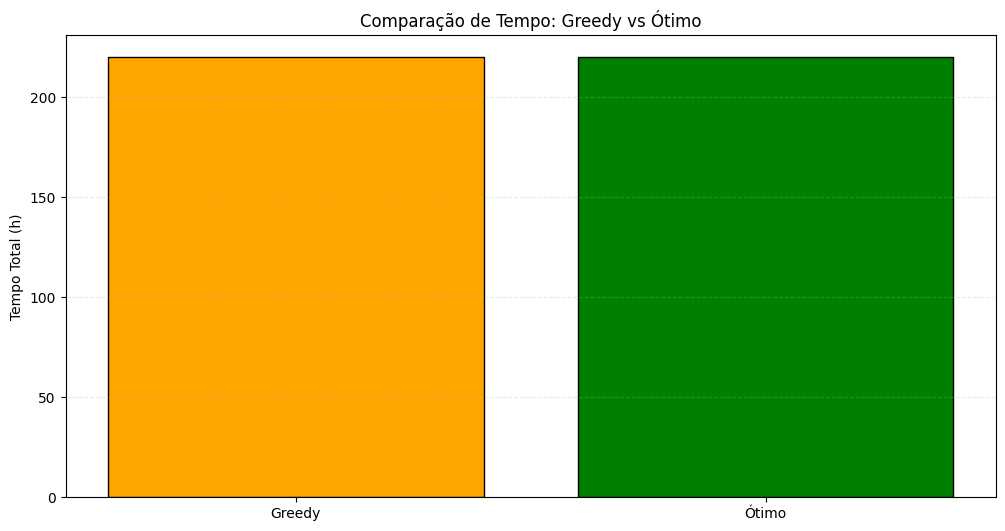

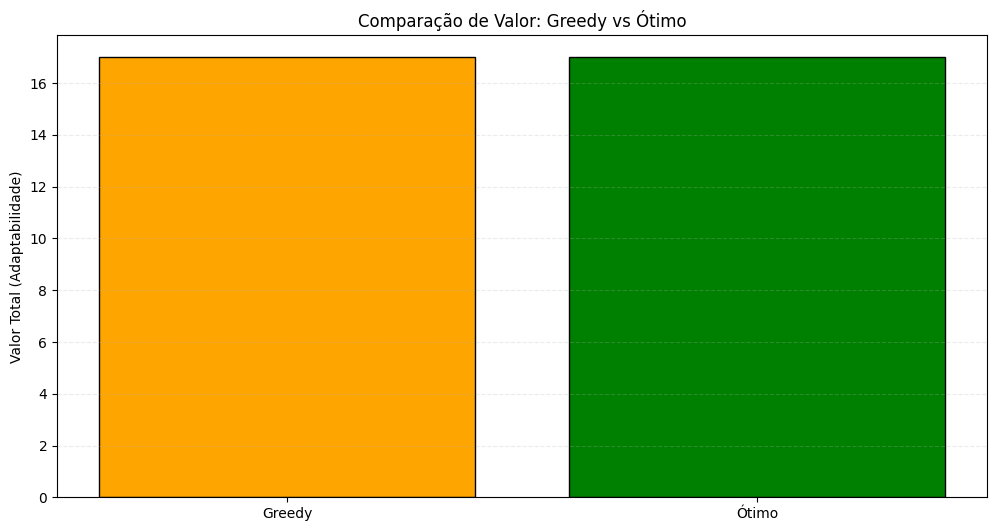

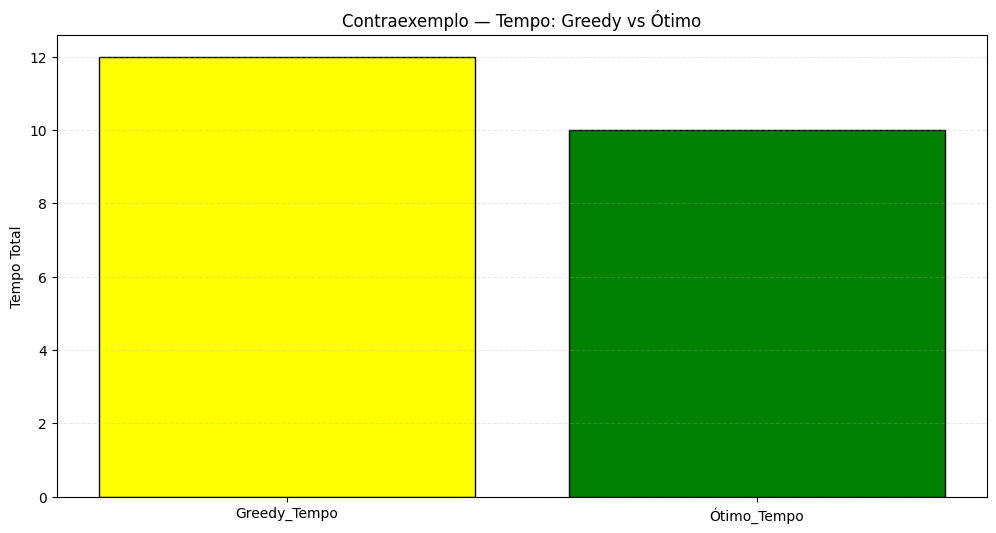

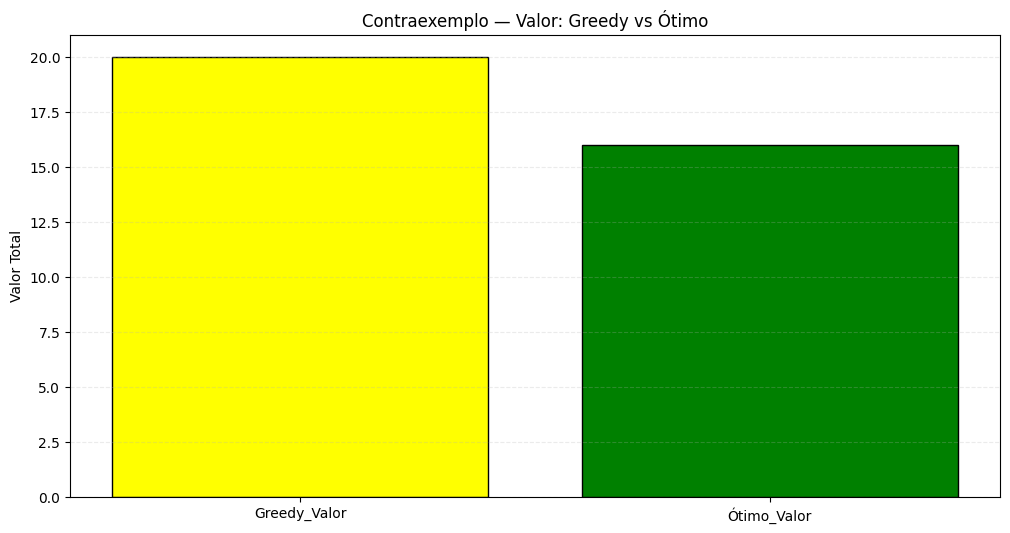

In [435]:
resultado_d3 = executarDesafio3(threshold_valor=15)

greedy = resultado_d3["Greedy_Real"]
otimo = resultado_d3["Otimo_Real"]
comparacao = resultado_d3["Comparacao_Real"]
contra = resultado_d3["Contraexemplo_Greedy"]

# Gráfico comparativo de tempo
tempos = [greedy["Tempo_Total"], otimo["Tempo_Total"]]
labels = ["Greedy", "Ótimo"]
plt.figure(figsize=(12,6))
plt.bar(labels, tempos, color=["orange","green"], edgecolor="black")
plt.ylabel("Tempo Total (h)")
plt.title("Comparação de Tempo: Greedy vs Ótimo")
plt.grid(axis='y', linestyle='--', alpha=0.25)
plt.show()

# Gráfico comparativo de valor
valores = [greedy["Valor_Total"], otimo["Valor_Total"]]
labels = ["Greedy", "Ótimo"]
plt.figure(figsize=(12,6))
plt.bar(labels, valores, color=["orange","green"], edgecolor="black")
plt.ylabel("Valor Total (Adaptabilidade)")
plt.title("Comparação de Valor: Greedy vs Ótimo")
plt.grid(axis='y', linestyle='--', alpha=0.25)
plt.show()

# Gráficos do contraexemplo (Greedy x Ótimo)
tempo_g = contra["Greedy"]["Tempo_Total"]
tempo_o = contra["Otimo"]["Tempo_Total"]
valor_g = contra["Greedy"]["Valor_Total"]
valor_o = contra["Otimo"]["Valor_Total"]
plt.figure(figsize=(12,6))
plt.bar(["Greedy_Tempo", "Ótimo_Tempo"], [tempo_g, tempo_o],
        color=["yellow","green"], edgecolor="black")
plt.ylabel("Tempo Total")
plt.title("Contraexemplo — Tempo: Greedy vs Ótimo")
plt.grid(axis='y', linestyle='--', alpha=0.25)
plt.show()
plt.figure(figsize=(12,6))
plt.bar(["Greedy_Valor", "Ótimo_Valor"], [valor_g, valor_o],
        color=["yellow","green"], edgecolor="black")
plt.ylabel("Valor Total")
plt.title("Contraexemplo — Valor: Greedy vs Ótimo")
plt.grid(axis='y', linestyle='--', alpha=0.25)
plt.show()


## **📋 CONCLUSÃO - DESAFIO 03**

### NÍVEL MÍNIMO DE ADAPTABILIDADE:

Os algoritmos feitos para o DESAFIO 03 calcularam estratégias "greedy" para selecionar habilidades básicas capazes de atingir um nível mínimo de adaptabilidade (≥ 15) e os compararam com uma solução ótima obtida por busca exaustiva

Além disso, foi analisada condições em que o método greedy falha, construindo um contraexemplo controlado.

### GREEDY x SOLUÇÃO ÓTIMA:

O método greedy ordena as habilidades pela razão Valor/Tempo (V/T) e seleciona até chegar no um nível mínimo de adaptabilidade. Essa abordagem tem baixo custo computacional e funciona bem quando a distribuição dos valores e tempos é relativamente uniforme.

Ja a solução ótima foi explora completamente todos os subconjuntos possíveis, identificando aquele possui menor tempo total, e usao maior valor como critério de desempate. Essa solução serve como referência absoluta de comparação.

Utilizando ambos os métodos no nosso conjunto de skills, eles alcançaram desempenho equivalente. As duas soluções atingiram nível mínimo de adaptabilidade com tempos muito próximos, ou seja, essa comparação demonstra que o greedy foi eficiente, oque mostra uma boa relação entre os valores de cada skill e seus tempos de execução.

### CONTRAEXEMPLO GREEDY x SOLUÇÃO ÓTIMA:

Ao análisar o contraexemplo do método greedy, observa-se que o método greedy pode falhar ao tentar atingir o nível mínimo de adaptabilidade, podendo ignorar soluções globalmente melhores quando a melhor combinação envolve elementos com baixa razão V/T.


## **4️⃣ DESAFIO 04: Trilhas Paralelas**

**🎯 OBJETIVO:** Ordenar as 12 habilidades por Complexidade C usando Merge Sort ou Quick Sort implementado por você. Dividir o resultado em Sprint A (1–6) e Sprint B (7–12).

In [436]:
resultado_d4 = executarDesafio4(reverse=False, mult_benchmark=2000, repeticoes_benchmark=7)

# DataFrame da trilha ordenada por complexidade
ordenadas = resultado_d4['Ordenadas_Por_Complexidade']
df_trilha = pd.DataFrame(
    [
        {'ID': sid,
         'Nome': info.get('Nome'),
         'Complexidade': info['Complexidade'],
         'Tempo': info['Tempo'],
         'Valor': info['Valor'],
         'PreRequisito': info.get('PreRequisito', [])}
        for sid, info in ordenadas
    ]
)

print('Trilha Ordenada por Complexidade:')
df_trilha


Trilha Ordenada por Complexidade:


,ID,Nome,Complexidade,Tempo,Valor,PreRequisito
0,S2,Modelagem de Dados (SQL),3,60,4,[]
1,H12,Introducao a IoT,3,30,3,[]
2,S1,Programacao Basica (Python),4,80,3,[]
3,S5,Visualizacao de Dados (BI),5,40,6,[S2]
4,S8,APIs e Microsservicos,6,90,6,[S1]
5,H10,Seguranca de Dados,6,60,5,[]
6,S7,Estruturas em Nuvem (AWS/Azure),7,70,5,[]
7,S3,Algoritmos Avancados,8,100,7,[S1]
8,S9,DevOps & CI/CD,8,110,9,"[S7, S8]"
9,H11,Analise de Big Data,8,90,8,[S4]


In [437]:
sprints = resultado_d4['Sprints']

# Dados da Sprint A
df_sprint_a = pd.DataFrame(
    [{'ID': sid, 'Nome': info.get('Nome'), 'Complexidade': info['Complexidade']}
     for sid, info in sprints['Sprint_A']]
)

print('Sprint A:')
df_sprint_a



Sprint A:


,ID,Nome,Complexidade
0,S2,Modelagem de Dados (SQL),3
1,H12,Introducao a IoT,3
2,S1,Programacao Basica (Python),4
3,S5,Visualizacao de Dados (BI),5
4,S8,APIs e Microsservicos,6
5,H10,Seguranca de Dados,6


In [438]:
# Dados da Sprint B
df_sprint_b = pd.DataFrame(
    [{'ID': sid, 'Nome': info.get('Nome'), 'Complexidade': info['Complexidade']}
     for sid, info in sprints['Sprint_B']]
)

print('Sprint B:')
df_sprint_b


Sprint B:


,ID,Nome,Complexidade
0,S7,Estruturas em Nuvem (AWS/Azure),7
1,S3,Algoritmos Avancados,8
2,S9,DevOps & CI/CD,8
3,H11,Analise de Big Data,8
4,S4,Fundamentos de Machine Learning,9
5,S6,IA Generativa Etica,10


In [439]:
bench = resultado_d4['Benchmark']
df_benchmark = pd.DataFrame([bench])
print('Benchmark:')
df_benchmark

Benchmark:


,Tamanho_Lista,Repeticoes,Tempo_QuickSort,Tempo_Sort_Nativo,Razao_Quick_vs_Nativo
0,24000,7,0.010365,0.001518,6.826717


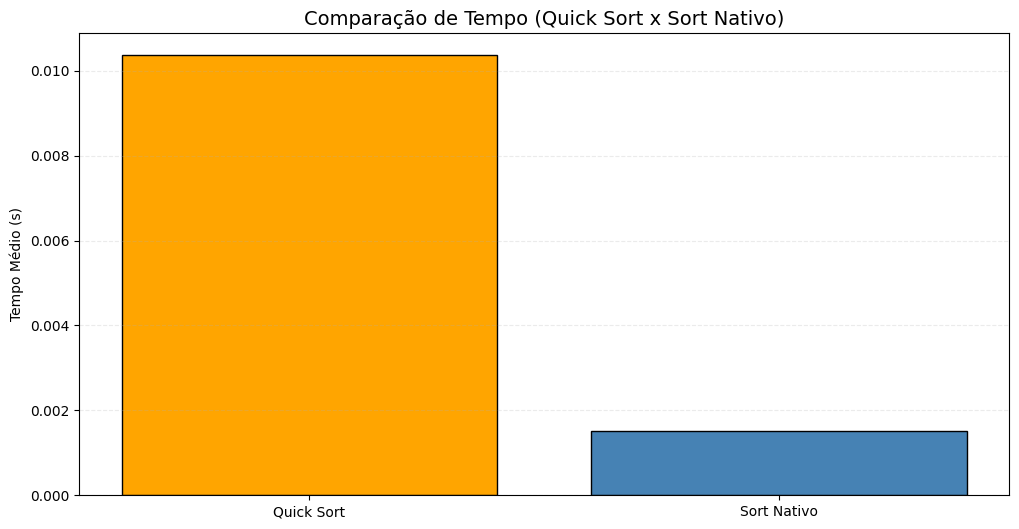

In [440]:
# Gráfico de barras do benchmark
df = df_benchmark
plt.figure(figsize=(12,6))
plt.bar(['Quick Sort', 'Sort Nativo'],
        [df['Tempo_QuickSort'][0], df['Tempo_Sort_Nativo'][0]],
        color=['orange', 'steelblue'],
        edgecolor='black')
plt.title('Comparação de Tempo (Quick Sort x Sort Nativo)', fontsize=14)
plt.ylabel('Tempo Médio (s)')
plt.grid(axis='y', linestyle='--', alpha=0.25)
plt.show()


## **📋 CONCLUSÃO - DESAFIO 04**

### ORDENAÇÃO POR COMPLEXIDADE:

Os algoritmos feitos para o DESAFIO 04 organizaram as 12 skills da base de dados, ordenando-as por complexidade, separando em 2 Sprints (A e B)

Os métodos de ordenação utilizados foram:

- Quick Sort (Implementado Manualmente)
- Sort Nativo do Python

### COMPARAÇÃO QUICK SORT x SORT NATIVO:

Na comparação direta dos dois métodos utilizados, observa-se que a função Sort nativa do python tem a execução significativamente mais rápida do que uma implementação manual de algoritimos de ordenação. Porém, apesar de não ser viável em aplicações reais, os algoritimos de ordenação implementados de forma manual permitem uma leitura clara do processo, possibilitando possibilitando destacar conceitos didáticos.

## **5️⃣ DESAFIO 05: Recomendar Próximas Habilidades**

**🎯 OBJETIVO:** Dado um perfil atual e um horizonte de 5 anos, sugerir as próximas 2–3 habilidades maximizando o valor esperado, considerando transições de mercado (probabilidades fornecidas por você ou simuladas).

In [441]:
perfil = {'S1', 'S2'}
# perfil = {'S1', 'S3', 'S4'}
resultado_d5 = executarDesafio5(perfil_atual=perfil)

# DataFrame do Plano de Desenvolvimento ao Longo dos 5 Anos
prob = resultado_d5['Probabilidades_Mercado']
plano = resultado_d5['Resultado_DP']['Plano_Completo_5_Anos']
linhas = []
ganho_acumulado = 0.0
for ano, sid in enumerate(plano, start=1):
    info = SKILLS[sid]
    valor = info['Valor']
    tempo = info['Tempo']
    complexidade = info['Complexidade']
    p = prob[sid]
    ganho_esperado = valor * p
    ganho_acumulado += ganho_esperado

    linhas.append({
        'Ano': ano,
        'Skill': sid,
        'Nome': info.get('Nome', ''),
        'Valor': valor,
        'Tempo': tempo,
        'Complexidade': complexidade,
        'Prob_Mercado': p,
        'Ganho_Esperado': ganho_esperado,
        'Ganho_Acumulado': ganho_acumulado,
    })

df_trilha = pd.DataFrame(linhas)
print('Plano de Desenvolvimento ao Longo dos 5 Anos:')
df_trilha

Plano de Desenvolvimento ao Longo dos 5 Anos:


,Ano,Skill,Nome,Valor,Tempo,Complexidade,Prob_Mercado,Ganho_Esperado,Ganho_Acumulado
0,1,S8,APIs e Microsservicos,6,90,6,0.092329,0.553973,0.553973
1,2,S3,Algoritmos Avancados,7,100,8,0.110008,0.770056,1.324029
2,3,S4,Fundamentos de Machine Learning,8,120,9,0.118591,0.948727,2.272756
3,4,S6,IA Generativa Etica,10,150,10,0.115753,1.157526,3.430282
4,5,H11,Analise de Big Data,8,90,8,0.086786,0.694289,4.124570


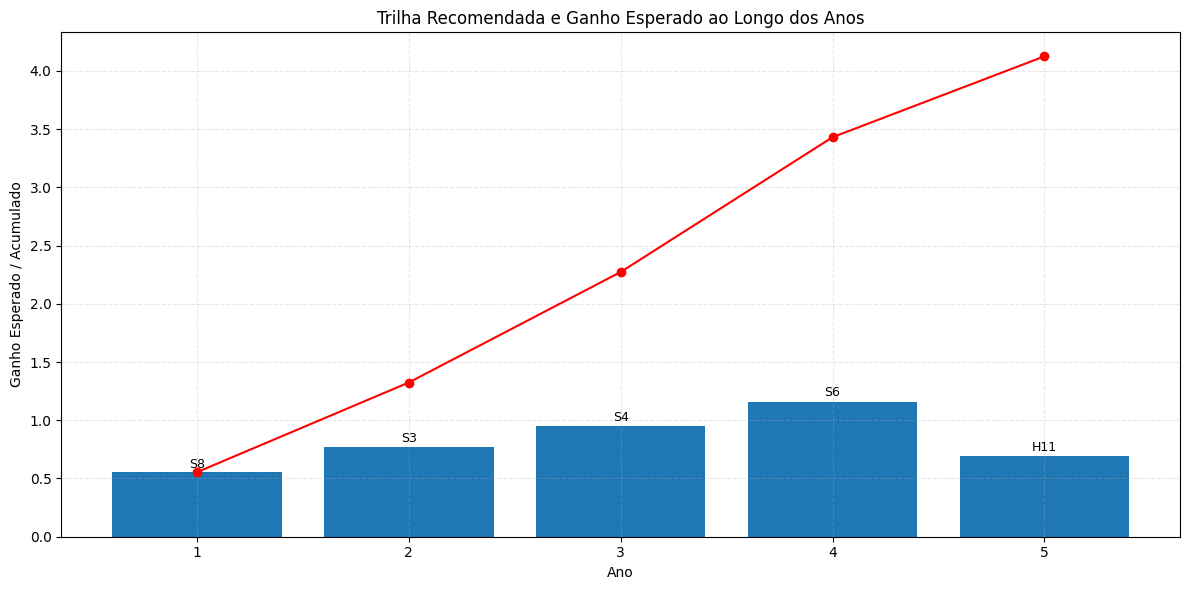

In [442]:
# Gráfico do Plano de Desenvolvimento ao Longo dos 5 Anos
plt.figure(figsize=(12, 6))
plt.bar(df_trilha['Ano'], df_trilha['Ganho_Esperado'])
plt.plot(df_trilha['Ano'], df_trilha['Ganho_Acumulado'], marker='o', color='red')
for _, row in df_trilha.iterrows():
    plt.text(row['Ano'], row['Ganho_Esperado'] * 1.02,
             row['Skill'],
             ha='center', va='bottom', fontsize=9)
plt.xticks(df_trilha['Ano'])
plt.xlabel('Ano')
plt.ylabel('Ganho Esperado / Acumulado')
plt.title('Trilha Recomendada e Ganho Esperado ao Longo dos Anos')
plt.grid(linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [443]:
# DataFrame das probabilidades de mercado
prob = resultado_d5['Probabilidades_Mercado']
df_prob = pd.DataFrame([
    {
        'Skill': sid,
        'Probabilidade_Mercado': p,
        'Valor': SKILLS[sid]['Valor'],
        'Complexidade': SKILLS[sid]['Complexidade'],
        'Valor_x_Prob_Mercado': SKILLS[sid]['Valor'] * p,
    }
    for sid, p in prob.items()
])

df_prob = df_prob.sort_values(by='Probabilidade_Mercado', ascending=False).reset_index(drop=True)
print('Probabilidades de Mercado:')
df_prob

Probabilidades de Mercado:


,Skill,Probabilidade_Mercado,Valor,Complexidade,Valor_x_Prob_Mercado
0,S9,0.118703,9,8,1.068327
1,S4,0.118591,8,9,0.948727
2,S6,0.115753,10,10,1.157526
3,S3,0.110008,7,8,0.770056
4,S8,0.092329,6,6,0.553973
5,H11,0.086786,8,8,0.694289
6,H10,0.079966,5,6,0.399831
7,S7,0.066298,5,7,0.331488
8,S5,0.063665,6,5,0.381988
9,S2,0.055447,4,3,0.221788


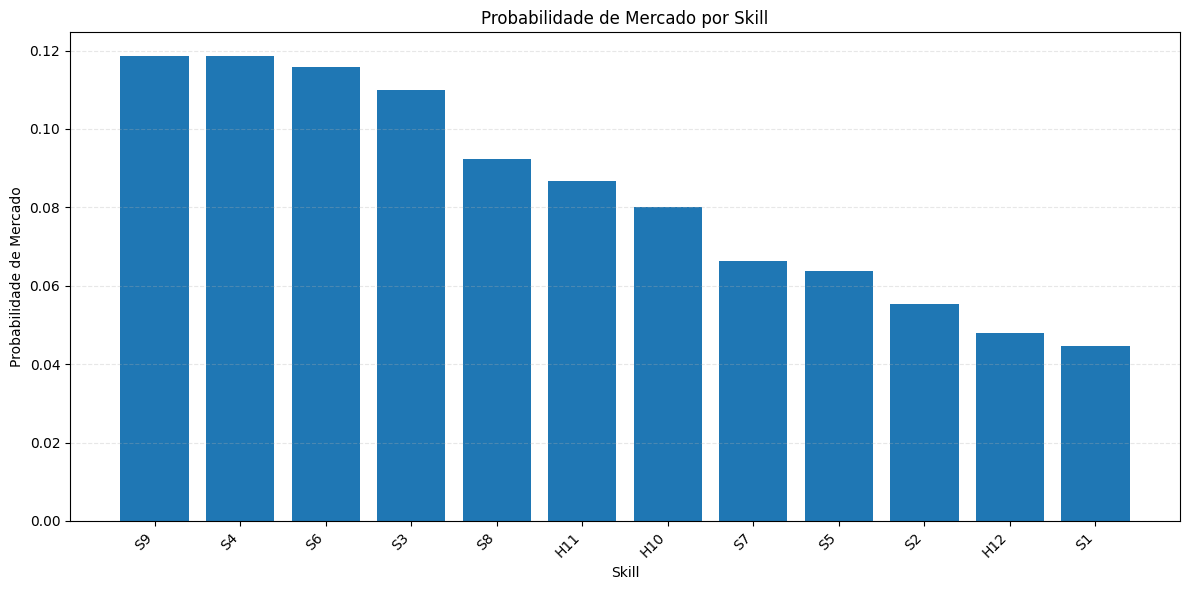

In [444]:
# Gráfico de barras das probabilidades de mercado
plt.figure(figsize=(12, 6))
plt.bar(df_prob['Skill'], df_prob['Probabilidade_Mercado'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Probabilidade de Mercado')
plt.xlabel('Skill')
plt.title('Probabilidade de Mercado por Skill')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [445]:
# DataFrame de Evolução do ganho esperado ao longo dos anos
plano = resultado_d5['Resultado_DP']['Plano_Completo_5_Anos']
prob = resultado_d5['Probabilidades_Mercado']
ganhos_ano = []
ganhos_acumulados = []
skills_ano = []
acum = 0.0
for i, sid in enumerate(plano, start=1):
    valor = SKILLS[sid]['Valor']
    p = prob[sid]
    ganho = valor * p
    acum += ganho
    skills_ano.append(sid)
    ganhos_ano.append(ganho)
    ganhos_acumulados.append(acum)

df_evolucao = pd.DataFrame({
    'Ano': list(range(1, len(plano) + 1)),
    'Skill': skills_ano,
    'Ganho_Esperado_Ano': ganhos_ano,
    'Ganho_Acumulado': ganhos_acumulados,
})

print('Evolução do Ganho Esperado ao Longo dos Anos:')
df_evolucao


Evolução do Ganho Esperado ao Longo dos Anos:


,Ano,Skill,Ganho_Esperado_Ano,Ganho_Acumulado
0,1,S8,0.553973,0.553973
1,2,S3,0.770056,1.324029
2,3,S4,0.948727,2.272756
3,4,S6,1.157526,3.430282
4,5,H11,0.694289,4.124570


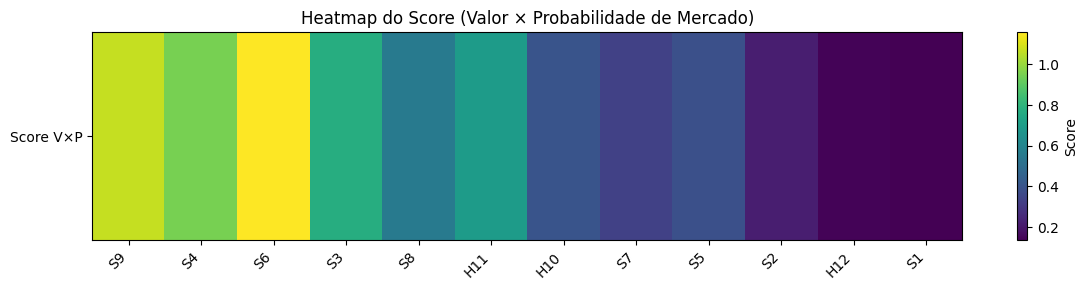

In [447]:
# Gráfico Heatmap do Score (Valor × Probabilidade de Mercado)
scores = df_prob['Valor_x_Prob_Mercado'].to_numpy()
skills = df_prob['Skill'].tolist()
fig, ax = plt.subplots(figsize=(12, 3))
heatmap = ax.imshow(scores.reshape(1, -1), aspect='auto')
ax.set_yticks([0])
ax.set_yticklabels(['Score V×P'])
ax.set_xticks(range(len(skills)))
ax.set_xticklabels(skills, rotation=45, ha='right')
plt.title('Heatmap do Score (Valor × Probabilidade de Mercado)')
plt.colorbar(heatmap, ax=ax, label='Score')
plt.tight_layout()
plt.show()


## **📋 CONCLUSÃO - DESAFIO 05**

### RECOMENDAÇÃO DE TRILHA DE ESTUDOS:

Os algoritmos feitos para o DESAFIO 05 calculam a partir de perfil de skills conhecidas e recomenda uma trilha de estudos ao longo dos proximos 5 anos.

Para isso, foi simulada distribuição de probabilidade de demanda no mercado de trabalho, para termos dados de quais skills têm maior tendência de relevância no futuro.

### ANÁLISE DE MERCADO:

Também foi analisada as tendências futuras dessa simulação de mercado, essa análise previu o ganho de relevância esperado por ano de cada skill para o mercado.


# **🔴 CONCLUSÃO FINAL**

Os 5 Desafios desenvolvidos neste projeto demonstraram, como técnicas de Programação Dinâmica, otimização e análise de dados podem ser aplicadas para transformar problemas abstratos em soluções estruturadas.

1️⃣ No Desafio 1, foi utilizado os fundamentos de incerteza e de simulação. Foi necessário criar modelos de consumo de recursos usando abordagens determinísticas e Monte Carlo. Ao comparar os dois métodos, foi evidenciado na análise que é importânte considerar variações e incertezas em sistemas reais, principalmente quando planejamentos dependem de estimativas que podem possuir ruído.

2️⃣ O Desafio 2 utilizou de análise combinatória ao explorar todas as permutações possíveis de uma sequência de habilidades, calculando e comparando seus custos totais. Aqui, a aplicação de força bruta permitiu identificar padrões dominantes dentro do espaço de soluções.

3️⃣ O Desafio 3, compara a estratégia "greedy" com a solução ótima exaustiva. A análise demonstrou que embora o método "greedy" seja eficiente e rápido, ao construir um contraexemplo, notamos que ele não garante a solução globalmente ideal.

4️⃣ O Desafio 4 focou em algoritmos de ordenação. A implementação manual do Quick Sort permitiu visualizar sua lógica interna e comparar seu desempenho com o Sort nativo do Python. A comparação dos dois métodos reforçou a distância entre algoritmos acadêmicos e implementações altamente otimizadas de produção.

5️⃣ Por fim, o Desafio 5 abordou um sistema de recomendação inteligente baseado em Programação Dinâmica em horizonte finito. A partir da distribuição de probabilidades de mercado, o algoritmo determinou a trilha ótima de aprendizado para os próximos anos, respeitando pré-requisitos e maximizando ganho esperado.

Com esse projeto, podemos concluir que modelos computacionais podem criar valor prático ao transformar dados em decisões concretas.

O resultado final é um relatório analítico, que demonstra como Programação Dinâmica, simulação e análise de dados podem ser utilizadas para estruturar estratégias, reduzir incerteza e orientar decisões inteligentes em ambientes reais.